# ПРОЕКТ "ОТТОК КЛИЕНТОВ МОБИЛЬНОГО ОПЕРАТОРА"

## Описание проекта

Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах. **В рамках проекта перед нами поставлена задача создать и обучить модель, которая бы предсказывала, откажется ли клиент от услуг оператора или нет.**

### Описание предлагаемых оператором услуг

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).


Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

### Варианты оплаты услуг

- За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. 
- Доступны различные способы расчёта и возможность получения электронного чека.

### Описание предоставленных данных

Данные состоят из файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.


Во всех файлах столбец customerID содержит код клиента.


Информация о договорах актуальна на 1 февраля 2020.

## План выполнения проекта

- изучим требования заказчика, приведенные в описании проекта
- посредством try/except загрузим предоставленные данные
- проведем их исследовательский анализ:
  - задействуем методы head, info, describe
  - визуализируем признаки
  - сделаем выводы, возникшие вопросы зададим teamlead
- осуществим предобработку данных:
  - объединим данные в единый df
  - проверим данные на дубликаты, пропуски и аномалии
  - при необходимости создадим новые признаки, отредактируем названия представленных, удалим бесполезные для анализа признаки
  - при необходимости изменим типы данных признаков
  - проверим признаки на наличие корреляций
- разделим данные на две выборки: обучающую и тестовую
- осуществим кодирование категориальных признаков
- при необходимости осуществим масштабирование признаков
- создадим и обучим модели машинного обучения на обучающей выборке:
  - будем использовать как минимум три модели, в т.ч. градиентный бустинг
  - в рамках обучения и выбора моделей будем осуществлять подбор гиперпараметров посредством кросс-валидации
- осуществим проверку качества лучшей модели на тестовой выборке
- исследуем важность признаков лучшей модели
- напишем вывод по результатам работы с моделями
- напишем общий вывод по проекту:
  - подсветим какие пункты плана выполнили, а какие нет
  - укажем трудности, с которыми столкнулись
  - опишем ключевые шаги по проекту
  - приведем лучшую модель с гиперпараметрами, укажем ее качество
  - обозначим список использованных для обучения признаков, опишем порядок их предобработки
  - финализируем рекомендацию заказчику.

## Исследовательский анализ данных

- в рамках проекта нам предоставлены данные о договорах, заключенных с клиентами с 2014 по 2020 гг., персональная информация о клиентах оператора, данные об использовании клиентами интернет услуг и телефонии;
- записей об использовании интернет услуг и телефонии меньше, чем данных о клиентах и заключенных договорах, так как, по видимому, не все клиенты ими пользуются;
- большинство клиентов продолжают пользоваться услугами оператора, поэтому в основном EndDate заполнено как No;
- в основном клиенты оплачивают услуги на ежемесячной основе посредством электронного чека, при этом большинство не требует бумажный вариант;
- у большинства клиентов ежемесячные расходы составляют порядка 20 ед.;
- база данных поровну содержит информацию о клиентах как мужского, так и женского пола. Также поровну распределены записи об одиноких клиентах и о клиентах с супругой/супругом;
- пенсионеры и клиенты с детьми представляют собой меньшинство в представленных данных;
- в части использования интернет-услуг отмечаем, что:
  - с небольшим перевесом клиенты предпочитают оптоволоконный кабельный интернет;
  - в основном клиенты не пользуются дополнительными интернет-услугами;
  - примерно поровну разделились клиенты, которые пользуются и не пользуются стриминговым ТВ и каталогом фильмов.
- в части использования услуг телефонии с небольшим перевесом преобладают клиенты, которые не пользуются возможностью подключения телефона к нескольким линиям одновременно;
- ряд признаков имеют неверный тип, исправим это далее на этапе предобработки данных.

In [1]:
#загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt

#!pip install scikit-learn==1.1.3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

!pip install lightgbm
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#открываем данные
#конструкцию с try/except, а также ссылку на данные в сети убрал в целях обеспечения конфиденциальности данных Практикума
contracts = \
    pd.read_csv('C:\\Users\\Илья\\Documents\\Программирование\\Data Science\\Проект_Финальный спринт\\contract_new.csv')

clients = \
    pd.read_csv('C:\\Users\\Илья\\Documents\\Программирование\\Data Science\\Проект_Финальный спринт\\personal_new.csv')
    
internet = \
    pd.read_csv('C:\\Users\\Илья\\Documents\\Программирование\\Data Science\\Проект_Финальный спринт\\internet_new.csv')
    
phone = \
    pd.read_csv('C:\\Users\\Илья\\Documents\\Программирование\\Data Science\\Проект_Финальный спринт\\phone_new.csv')

- в рамках проекта нам предоставлены данные о договорах, заключенных с клиентами, персональная информация о клиентах оператора, данные об использовании клиентами интернет услуг и телефонии;
- максимальная длина df - более 7 тыс. строк. Это данные о клиентах и заключенных договорах. Записей об использовании интернет услуг и телефонии меньше, так как, по видимому, не все клиенты ими пользуются;
- ряд признаков имеют неверный тип, исправим это далее на этапе предобработки данных

In [3]:
#смотрим на представленные данные
def data_analysis(df):
    display(df.head())
    print()
    print(df.shape)
    print()
    print(df.dtypes)
    
for df_name, df in zip(['contracts', 'clients', 'internet', 'phone'], [contracts, clients, internet, phone]):
    print(df_name)
    data_analysis(df)
    print()

contracts


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



(7043, 8)

customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

clients


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



(7043, 5)

customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

internet


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



(5517, 8)

customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

phone


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



(6361, 2)

customerID       object
MultipleLines    object
dtype: object



- нам предоставлена информация о договорах, заключенных с 2014 по 2020 гг. Большинство клиентов продолжают пользоваться услугами оператора, поэтому в основном EndDate заполнено как No;
- в основном клиенты оплачивают услуги на ежемесячной основе посредством электронного чека, при этом большинство не требует бумажный вариант;
- у большинства клиентов ежемесячные расходы составляют порядка 20 ед.;
- база данных поровну содержит информацию о клиентах как мужского, так и женского пола. Также поровну распределены записи об одиноких клиентах и о клиентах с супругой/супругом;
- пенсионеры и клиенты с детьми представляют собой меньшинство в представленных данных;
- в части использования интернет-услуг отмечаем, что:
  - с небольшим перевесом клиенты предпочитают оптоволоконный кабельный интернет;
  - в основном клиенты не пользуются блокировкой опасных сайтов, облачным хранилищем файлов, антивирусом, выделенной линией технической поддержки;
  - примерно поровну разделились клиенты, которые пользуются и не пользуются стриминговым ТВ и каталогом фильмов.
- в части использования услуг телефонии с небольшим перевесом преобладают клиенты, которые не пользуются возможностью подключения телефона к нескольким линиям одновременно.

contracts


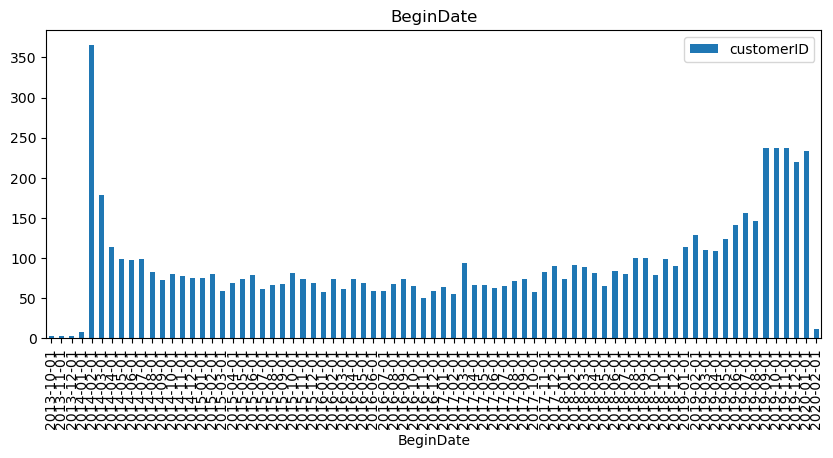

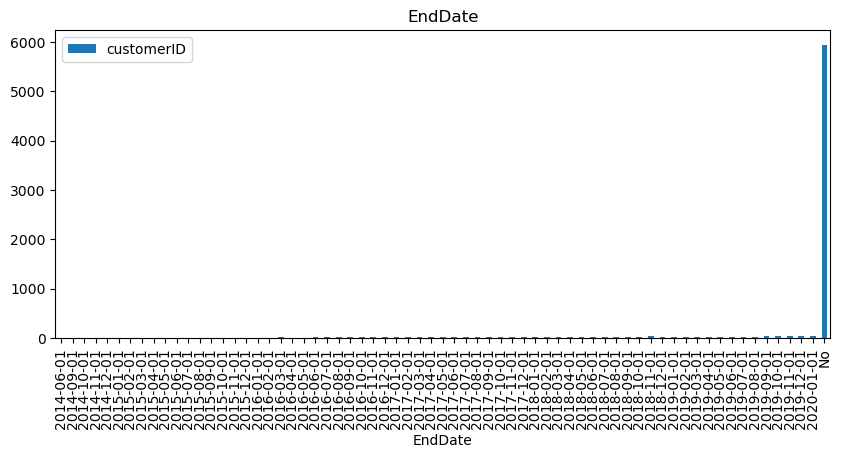

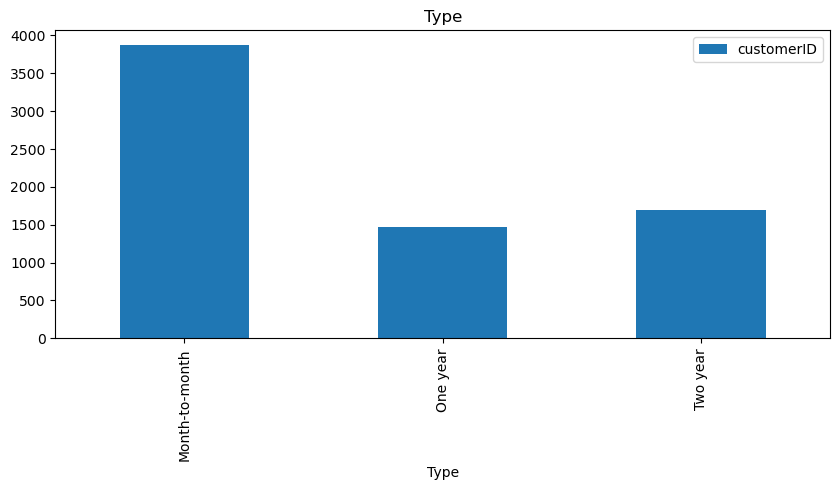

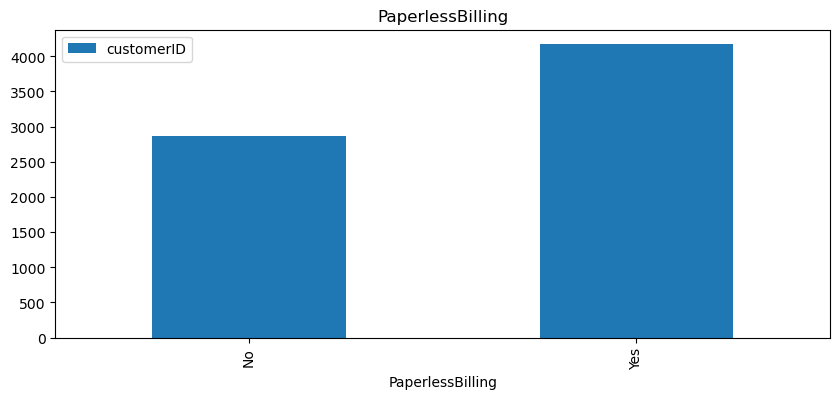

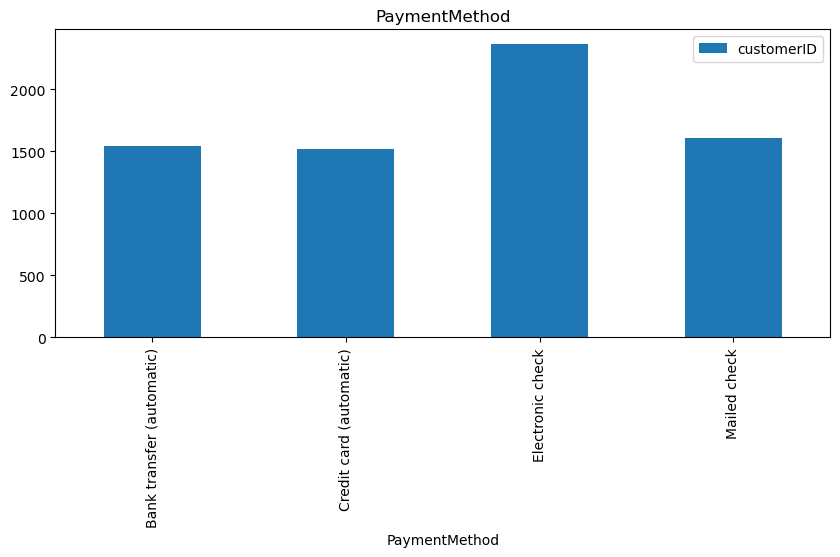

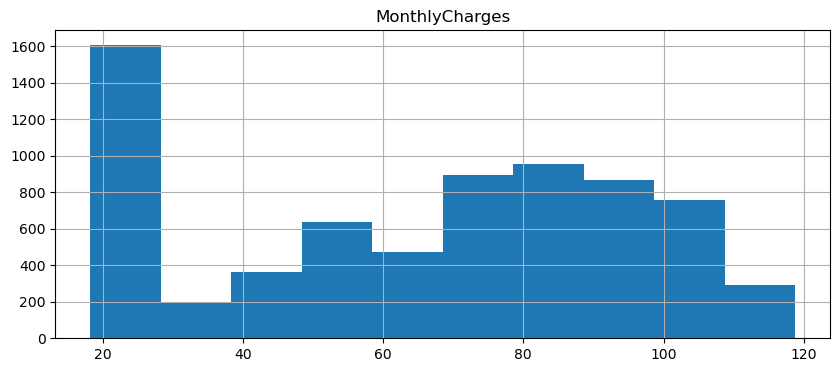


clients


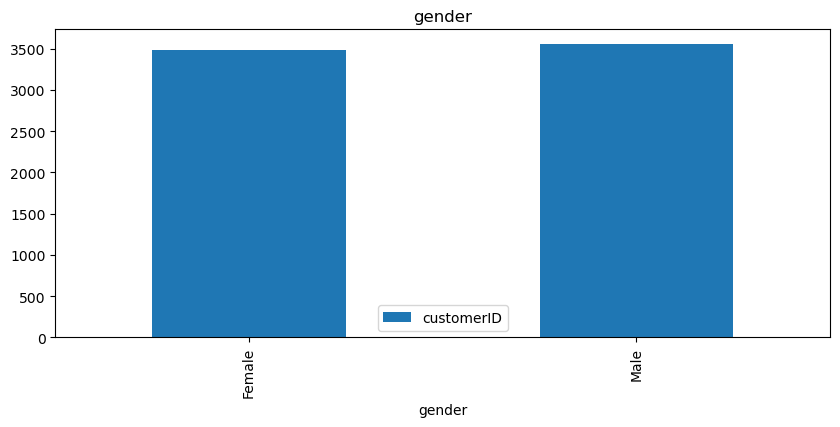

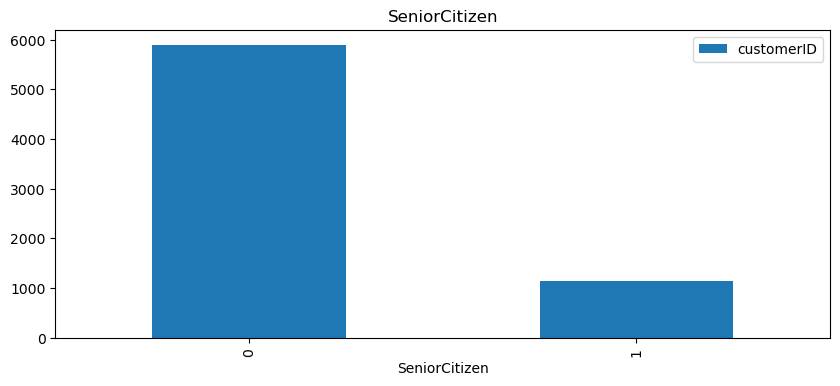

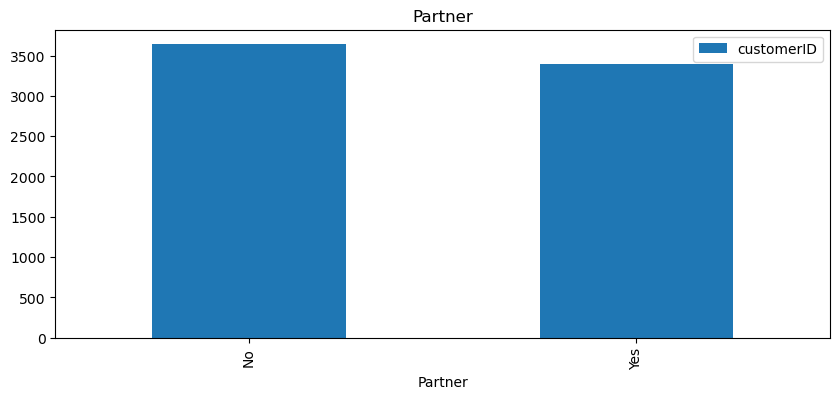

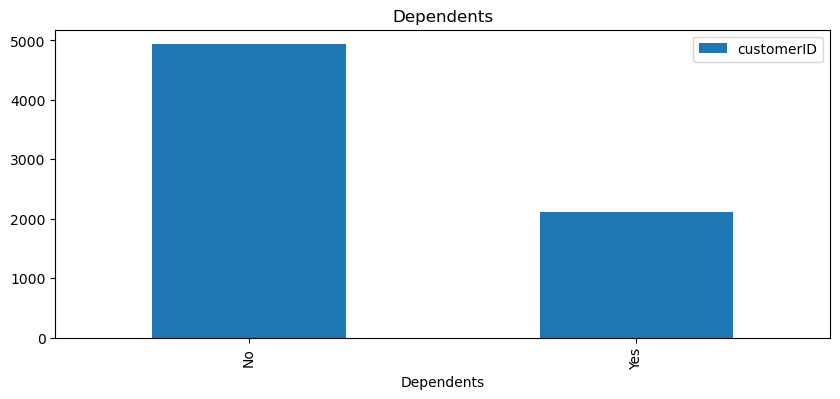


internet


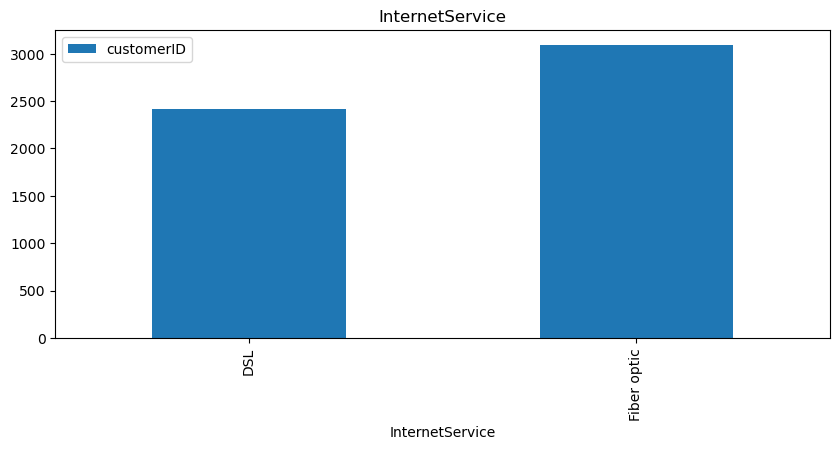

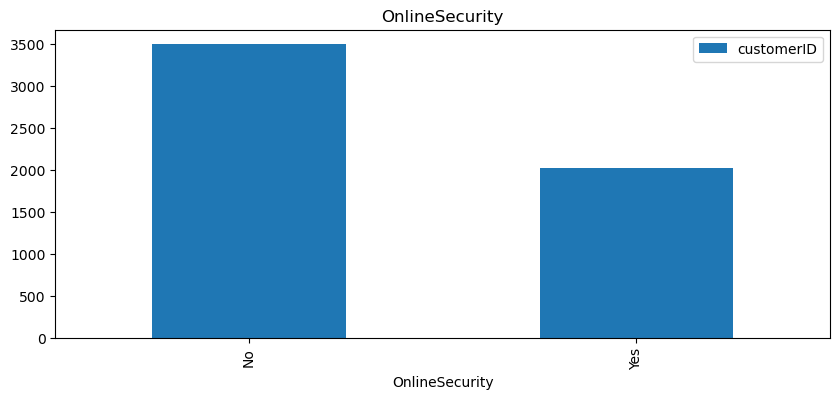

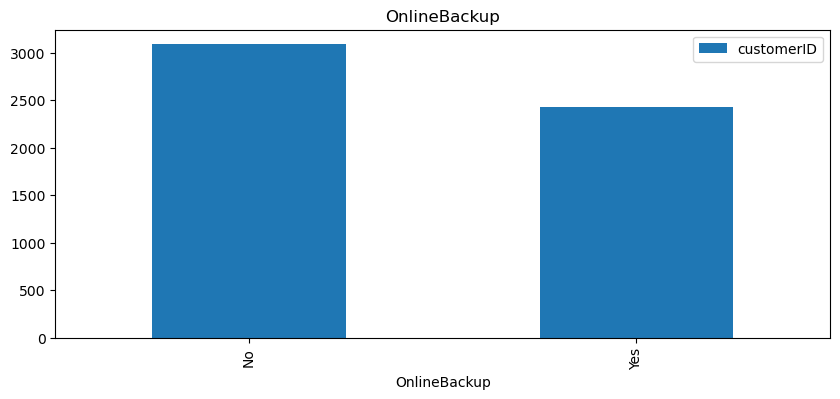

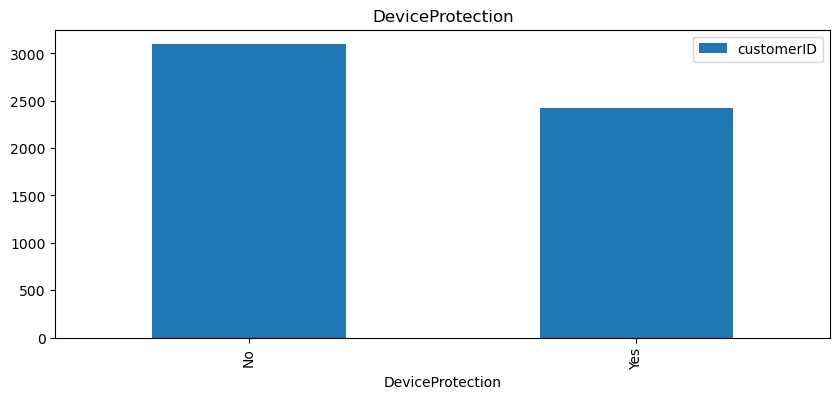

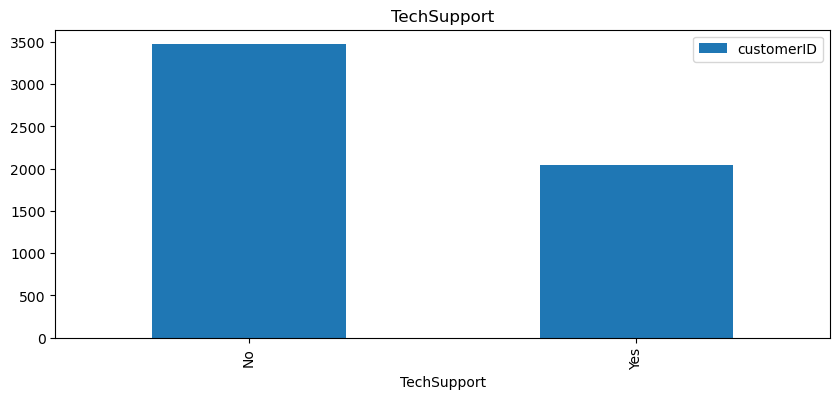

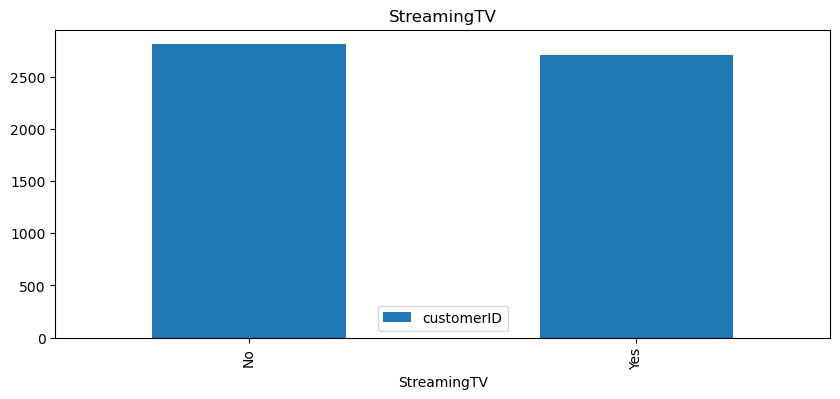

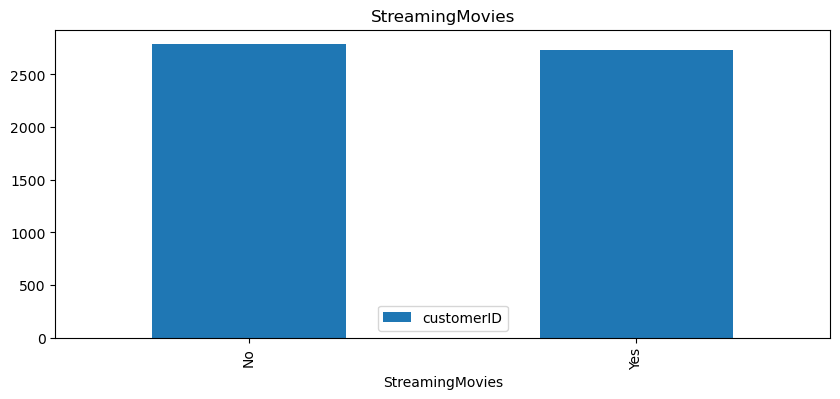


phone


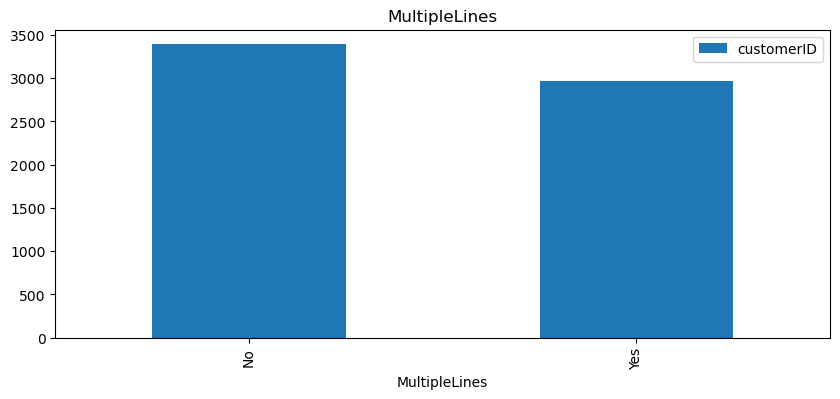

In [4]:
#визуализация
def data_analysis_graphic(df):
    for column in df.columns:
        if column == 'MonthlyCharges':
            df['MonthlyCharges'].hist(figsize=(10, 4));
            plt.title('MonthlyCharges')
            plt.show()
        else:
            if column not in ['customerID', 'TotalCharges']:
                df.pivot_table(index=column, values='customerID', aggfunc='count').plot(kind='bar', figsize=(10, 4));
                plt.title(column)
                plt.show()
                
for df_name, df in zip(['contracts', 'clients', 'internet', 'phone'], [contracts, clients, internet, phone]):
    print(df_name)
    data_analysis_graphic(df)
    print()

## Предобработка данных

В рамках предобработки данных было сделано следующее:
- четыре df объединили в один
- проверили данные на дубликаты: они не выявлены
- обработали явные пропуски в признаках с дополнительными услугами в части интернета и телефонии, а также неявные пропуски в столбцах EndDate и TotalCharges
- изменили тип данных в признаках с датами и TotalCharges
- значимых аномалий в количественных столбцах не выявили
- зафиксировали положительную корреляцию между количественными признаками MonthlyCharges и TotalCharges, что вполне логично. Учитывая, что в дальнейшем мы не будем работать с данными признаками, выявленную корреляцию можем оставить без изменений
- добавили новые признаки: длительность жизни клиента в днях, целевой признак (отказался ли клиент от услуг оператора или нет)
- убрали бесполезные для анализа признаки

Методом merge объединили четыре df в один

In [5]:
#объединяем df в один
data_clients_contracts = clients.merge(contracts, on='customerID', how='left')
data_clients_contracts_internet = data_clients_contracts.merge(internet, on='customerID', how='left')
data = data_clients_contracts_internet.merge(phone, on='customerID', how='left')
display(data.head())
print()
print(data.shape)
print()
print(data.dtypes)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Fiber optic,No,No,No,No,No,No,No



(7043, 20)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
MultipleLines        object
dtype: object


### Работа с дубликатами и пропусками

Явные дубликаты отсутствуют. Знакомство с данными, проведенное выше, позволяет сделать вывод о том, что и неявные дубликаты также отсутствуют

In [6]:
#проверка на явные дубликаты
print(data.duplicated().sum())

0


Пропуски зафиксированы в признаках с дополнительными услугами в части интернета и телефонии

In [7]:
#проверка на пропуски
print(data.isna().sum())

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64


Максимальная доля пропусков в признаках превышает 20% от общего кол-ва записей. Этого довольно много - удалять их не стоит. Скорее всего пропуск означает, что клиент не пользуется дополнительными услугами. Поэтому заменим пропуски на "No"

In [8]:
print(len(data.query('InternetService.isna()==True')) / len(data))

0.21666903308249325


Пропуски устранены

In [9]:
#устраняем пропуски
data_no_isna = data.fillna(value='No')
print(data_no_isna.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64


В признаке EndDate пропуски отсутствуют, но есть значение No. Таких значений более 80%. По видимому - это наш целевой признак: отказались ли клиенты от услуг оператора или нет. В целях дальнейшего изменения типов данных в признаках заменим No на текущую дату - 01.02.2020

5942
0.8436745704955275


,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,Fiber optic,No,No,No,No,No,No,No



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
MultipleLines        object
dtype: object


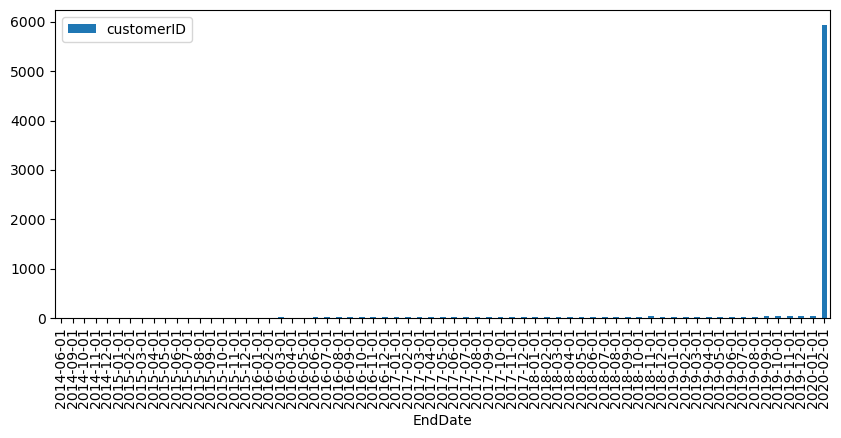

In [10]:
#EndDate
print(data_no_isna.loc[data_no_isna['EndDate'] == 'No', 'EndDate'].count())
print(data_no_isna.loc[data_no_isna['EndDate'] == 'No', 'EndDate'].count() / len(data_no_isna))
data_no_isna.loc[data_no_isna['EndDate'] == 'No', 'EndDate'] = '2020-02-01'
display(data_no_isna.head())
print()
print(data_no_isna.dtypes)
data_no_isna.pivot_table(index='EndDate', values='customerID', aggfunc='count').plot(kind='bar', figsize=(10, 4));

Также пробел в формате object зафиксирован в столбце TotalCharges. Доля таких пробелов невысока, избавимся от них

In [11]:
#TotalCharges
print(data_no_isna.loc[data_no_isna['TotalCharges'] == ' ', 'TotalCharges'].count())
print(data_no_isna.loc[data_no_isna['TotalCharges'] == ' ', 'TotalCharges'].count() / len(data_no_isna))
data_no_isna2 = data_no_isna[data_no_isna['TotalCharges'] != ' ']
print(data_no_isna2.loc[data_no_isna2['TotalCharges'] == ' ', 'TotalCharges'].count())

11
0.001561834445548772
0


### Работа с типами данных

Изменили тип данных в признаках с датами

In [12]:
for sign in ['BeginDate', 'EndDate']:
    data_no_isna2[sign] = pd.to_datetime(data_no_isna2[sign], format='%Y.%m.%d')

display(data_no_isna2.head())
print()
print(data_no_isna2.dtypes)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,Fiber optic,No,No,No,No,No,No,No



customerID                  object
gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges                object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
MultipleLines               object
dtype: object


Изменили тип данных в признаке TotalCharges

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Fiber optic,No,No,No,No,No,No,No



customerID                  object
gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
MultipleLines               object
dtype: object


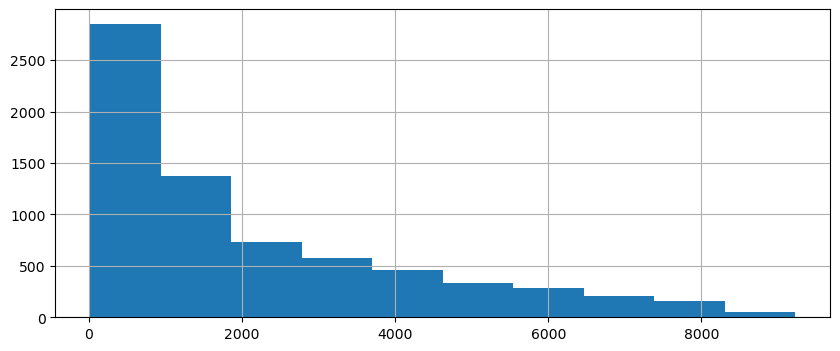

In [13]:
#TotalCharges
data_no_isna2['TotalCharges'] = pd.to_numeric(data_no_isna2['TotalCharges'])
display(data_no_isna2.head())
print()
print(data_no_isna2.dtypes)
data_no_isna2['TotalCharges'].hist(figsize=(10, 4));

### Работа с аномалиями

Значимых аномалий в количественных столбцах не выявлено

MonthlyCharges


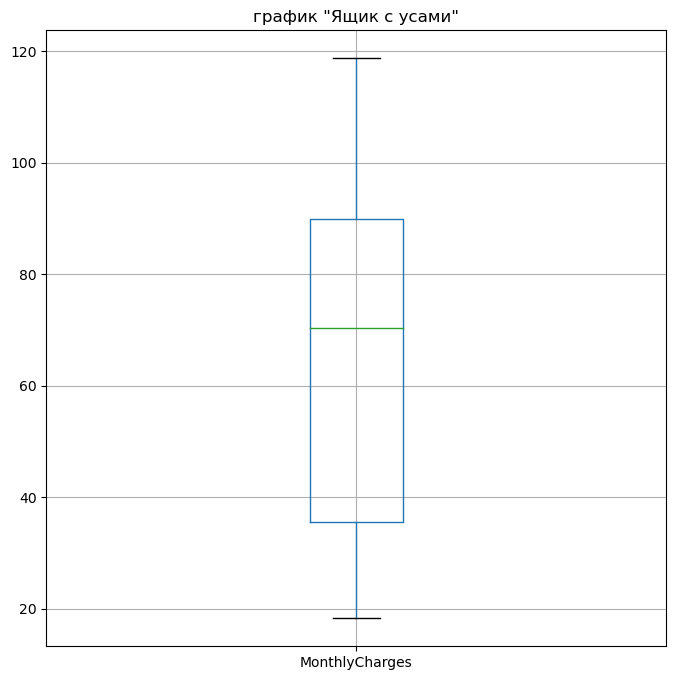


count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

TotalCharges


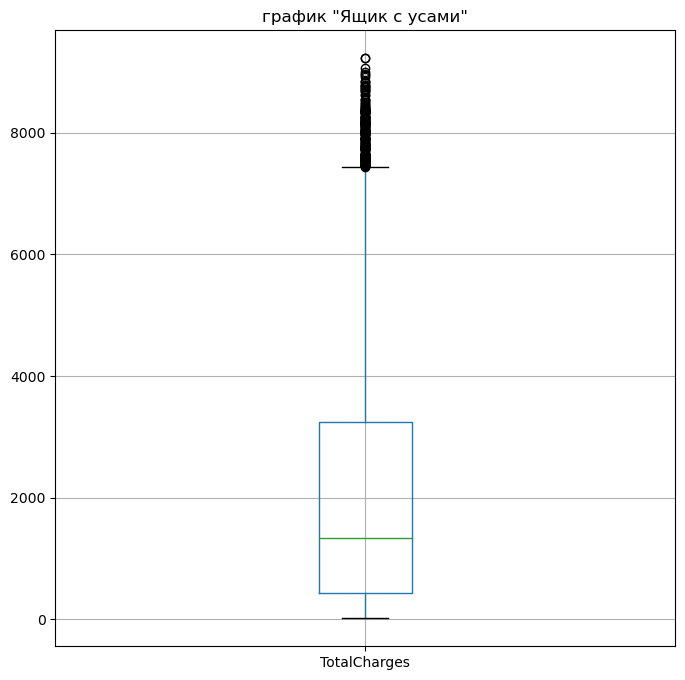


count    7032.000000
mean     2118.621822
std      2112.736199
min        19.050000
25%       439.745000
50%      1345.275000
75%      3239.317500
max      9221.380000
Name: TotalCharges, dtype: float64



In [14]:
#проверяем на аномалии количественные столбцы
for sign in ['MonthlyCharges', 'TotalCharges']:
    print(sign)
    data_no_isna2.boxplot(sign, figsize=(8, 8));
    plt.title('график "Ящик с усами"')
    plt.show()
    print()
    print(data_no_isna2[sign].describe())
    print()

### Работа с корреляцией

Зафиксирована положительная корреляция между количественными признаками MonthlyCharges и TotalCharges, что вполне логично. Учитывая, что в дальнейшем мы не будем работать с данными признаками (только возможно создадим новый категориальный столбец на их основании), выявленную корреляцию можем оставить без изменений

коэ-т корр-ции: 0.6302966354645495


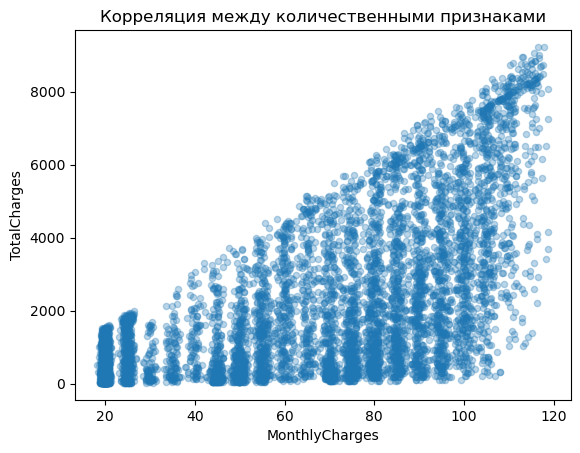

In [15]:
#анализ корреляции между количественными признаками MonthlyCharges и TotalCharges
print('коэ-т корр-ции:', data_no_isna2['MonthlyCharges'].corr(data_no_isna2['TotalCharges']))
data_no_isna2.plot(x='MonthlyCharges', y='TotalCharges', kind='scatter', alpha=0.3);
plt.title('Корреляция между количественными признаками')
plt.show()

### Создаем новые признаки

In [16]:
#длительность жизни клиента в днях
data_no_isna2['duration'] = data_no_isna2['EndDate'] - data_no_isna2['BeginDate']
display(data_no_isna2.head())
print()
print(data_no_isna2['duration'].dtypes)
print()
print(min(data_no_isna2['duration']))
print(max(data_no_isna2['duration']))

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,...,31.04,DSL,No,Yes,No,No,No,No,No,31 days
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,...,2071.84,DSL,Yes,No,Yes,No,No,No,No,1036 days
2,3668-QPYBK,Male,0,No,No,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,...,226.17,DSL,Yes,Yes,No,No,No,No,No,123 days
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),...,1960.60,DSL,Yes,No,Yes,Yes,No,No,No,1371 days
4,9237-HQITU,Female,0,No,No,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,...,353.50,Fiber optic,No,No,No,No,No,No,No,153 days



timedelta64[ns]

28 days 00:00:00
2314 days 00:00:00


In [17]:
data_no_isna2['duration2'] = data_no_isna2['duration'].dt.days
display(data_no_isna2.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration,duration2
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,...,DSL,No,Yes,No,No,No,No,No,31 days,31
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,...,DSL,Yes,No,Yes,No,No,No,No,1036 days,1036
2,3668-QPYBK,Male,0,No,No,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,...,DSL,Yes,Yes,No,No,No,No,No,123 days,123
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),...,DSL,Yes,No,Yes,Yes,No,No,No,1371 days,1371
4,9237-HQITU,Female,0,No,No,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,No,No,No,No,No,153 days,153


Добавили целевой признак для последующего анализа

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration,duration2,is_active
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,...,No,Yes,No,No,No,No,No,31 days,31,1.0
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,...,Yes,No,Yes,No,No,No,No,1036 days,1036,1.0
2,3668-QPYBK,Male,0,No,No,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,...,Yes,Yes,No,No,No,No,No,123 days,123,1.0
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),...,Yes,No,Yes,Yes,No,No,No,1371 days,1371,1.0
4,9237-HQITU,Female,0,No,No,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,...,No,No,No,No,No,No,No,153 days,153,1.0


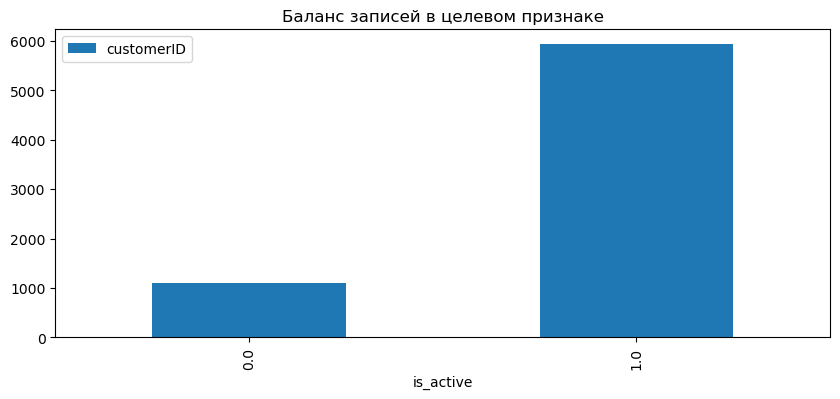

In [18]:
#целевой признак
data_no_isna2.loc[data_no_isna2['EndDate'] == '2020-02-01', 'is_active'] = 1
data_no_isna2.loc[data_no_isna2['EndDate'] < '2020-02-01', 'is_active'] = 0
display(data_no_isna2.head())
data_no_isna2.pivot_table(index='is_active', values='customerID', aggfunc='count').plot(kind='bar', figsize=(10, 4));
plt.title('Баланс записей в целевом признаке')
plt.show()

Убираем бесполезные для анализа признаки

In [19]:
#убираем бесполезные для работы признаки
print(data_no_isna2.dtypes)
data_final = data_no_isna2.drop(['customerID', 'BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges', 'duration'], axis=True)
print()
print(data_final.dtypes)

customerID                   object
gender                       object
SeniorCitizen                 int64
Partner                      object
Dependents                   object
BeginDate            datetime64[ns]
EndDate              datetime64[ns]
Type                         object
PaperlessBilling             object
PaymentMethod                object
MonthlyCharges              float64
TotalCharges                float64
InternetService              object
OnlineSecurity               object
OnlineBackup                 object
DeviceProtection             object
TechSupport                  object
StreamingTV                  object
StreamingMovies              object
MultipleLines                object
duration            timedelta64[ns]
duration2                     int64
is_active                   float64
dtype: object

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Type                 object
PaperlessBilling 

## Создание и обучение моделей

В рамках работы с моделями мы:
- выделили целевой и обучающие признаки, разделили данные на две выборки
- осуществили кодирование категориальных признаков методами One-Hot Encoder Ridge и Ordinal Encoding
- осуществили масштабирование численных признаков
- для обучения использовали четыре типа моделей (решающего дерева, случайного леса, градиентного бустинга и логистической регрессии)
- в рамках работы с моделями использовали различные гипер-параметры
- методом кросс-валидации выбрали лучшую модель
- науличший результат получили у модели Градиентного бустинга с параметром n_estimators=91
- проверили нашу лучшую модель на тестовой выборке: значение оценочной метрики (roc auc score) составило 0.91, что лучше (больше) требуемого заказчиком уровня в 0.85
- построили матрицу ошибок: наша модель достаточно хорошо предсказала, что клиент оператора останется. В части предсказания того, что клиент уйдет от оператора кол-во ложных ответов немного превышает кол-во правильных ответов
- оценили важность признаков для лучшей модели: наиболее важным признаком оказался добавленный нами duration2 (продолжительность пользования клиентом услугами оператора), также достаточно высокую важность показал признак Type (тип оплаты: раз в год-два или ежемесячно)

### Разделение данных на две выборки, выделение обучающих и целевого признаков

Выделили целевой и обучающие признаки

In [20]:
#выделяем целевой и обучающие признаки
features = data_final.drop('is_active', axis=True)
target = data_final['is_active']

Разделили данные на две выборки

In [21]:
#разбиваем данные на выборки
features_train, features_test, target_train, target_test =\
train_test_split(features, target, test_size=0.25, random_state=180723)

for df in [features_train, features_test, target_train, target_test]:
    print(df.shape)

(5274, 16)
(1758, 16)
(5274,)
(1758,)


### One-Hot Encoder Ridge

Осуществили кодирование категориальных признаков и масштабирование численных

In [22]:
#категориальные признаки для OHE Ridge
object_signs_ridge = features_train.select_dtypes(include='object').columns.to_list()
print(object_signs_ridge)

['gender', 'Partner', 'Dependents', 'Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [23]:
#НОВОЕ
#численные признаки
digit_signs_ridge = features_train.select_dtypes(exclude='object').columns.to_list()
#убираем признак SeniorCitizen, так как он по факту бинарный
digit_signs_ridge.remove('SeniorCitizen')
print(digit_signs_ridge)

['duration2']


In [24]:
features_train_ridge = features_train.copy()
features_test_ridge = features_test.copy()

In [25]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder_ohe.fit(features_train_ridge[object_signs_ridge])
features_train_ridge[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train_ridge[object_signs_ridge])
features_train_ridge = features_train_ridge.drop(object_signs_ridge, axis=1)

In [26]:
#НОВОЕ
#масштабирование
scaler = StandardScaler()
features_train_ridge[digit_signs_ridge] = scaler.fit_transform(features_train_ridge[digit_signs_ridge])
display(features_train_ridge.head())

,SeniorCitizen,duration2,gender_Male,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
4309,0,-0.346825,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1662,0,-0.971885,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0,-1.150892,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
847,0,-0.795811,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
468,0,0.634783,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Кодирование категориальных признаков методом Ordinal Encoding

Выделили категориальные признаки, нуждающиеся в кодировании, и цифровые признаки

In [27]:
object_signs = ['gender', 'Partner', 'Dependents', 'Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService',\
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',\
                'MultipleLines']
digit_signs = ['SeniorCitizen', 'duration2']

Осуществили порядковое кодирование категориальных признаков для обучения моделей Решающего дерева и Случайного леса

In [28]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
encoder.fit(features_train[object_signs])

features_train_oe = features_train.copy()
features_test_oe = features_test.copy()

features_train_oe[object_signs] = encoder.transform(features_train_oe[object_signs])
features_test_oe[object_signs] = encoder.transform(features_test_oe[object_signs])

print('train', features_train_oe.shape)
print('test', features_test_oe.shape)

train (5274, 16)
test (1758, 16)


### Создание и обучение моделей методом кросс-валидации

### Решающее дерево

In [29]:
model_dt = DecisionTreeClassifier(random_state=180723)
parameters_range = {'max_depth': [1, 6, 1], 'min_samples_leaf': [1, 3, 1]}

In [30]:
#n_iter=4, random_state=180723, n_jobs=-1, verbose=2
#roc_auc_score
gscv_dt = GridSearchCV(model_dt, parameters_range, cv=5, scoring='roc_auc')

In [31]:
gscv_dt.fit(features_train_oe, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=180723),
             param_grid={'max_depth': [1, 6, 1], 'min_samples_leaf': [1, 3, 1]},
             scoring='roc_auc')

В рамках модели Решающего дерева науличший результат получили при max_depth=6 и min_samples_leaf=3

In [32]:
gscv_dt.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=180723)

In [33]:
MAX_DEPTH = 6
MIN_SAMPLES_LEAF = 3

При указанных выше параметрах получили значение метрики roc auc score = 0.78954291

In [34]:
ROC_AUC_DT = 0.78954291

In [35]:
gscv_dt.cv_results_

{'mean_fit_time': array([0.00279284, 0.00259299, 0.00259333, 0.00538535, 0.0053854 ,
        0.00498862, 0.00259304, 0.00219173, 0.00239697]),
 'std_fit_time': array([3.98994016e-04, 4.88869710e-04, 4.88947841e-04, 4.88559483e-04,
        4.88811257e-04, 3.69787139e-06, 4.88811281e-04, 3.99756664e-04,
        4.85787356e-04]),
 'mean_score_time': array([0.00199456, 0.00159559, 0.00179524, 0.00199494, 0.00179539,
        0.00183225, 0.00179524, 0.00199709, 0.00179181]),
 'std_score_time': array([1.78416128e-07, 4.88499796e-04, 3.98969665e-04, 1.16800773e-07,
        3.98922081e-04, 3.19862458e-04, 3.99208154e-04, 1.47199870e-05,
        3.96914467e-04]),
 'param_max_depth': masked_array(data=[1, 1, 1, 6, 6, 6, 1, 1, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 3, 1, 1, 3, 1, 1, 3, 1],
              mask=[False, False, False, 

### Случайный лес

In [36]:
model_rf = RandomForestClassifier(random_state=180723)
parameters_range = {'n_estimators': [10, 51, 10]}

In [37]:
gscv_rf = GridSearchCV(model_rf, parameters_range, cv=5, scoring='roc_auc')

In [38]:
gscv_rf.fit(features_train_oe, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=180723),
             param_grid={'n_estimators': [10, 51, 10]}, scoring='roc_auc')

В рамках модели Случайного леса науличший результат получили при n_estimators=51

In [39]:
gscv_rf.best_estimator_

RandomForestClassifier(n_estimators=51, random_state=180723)

In [40]:
N_EST_RF = 51

При указанном выше параметре получили значение метрики roc auc score = 0.79705353

In [41]:
gscv_rf.cv_results_

{'mean_fit_time': array([0.02932162, 0.13853965, 0.02903514]),
 'std_fit_time': array([0.00079837, 0.00092667, 0.00427882]),
 'mean_score_time': array([0.00319161, 0.01137028, 0.00339227]),
 'std_score_time': array([0.00039904, 0.00048825, 0.00173955]),
 'param_n_estimators': masked_array(data=[10, 51, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 51}, {'n_estimators': 10}],
 'split0_test_score': array([0.79678144, 0.81762826, 0.79678144]),
 'split1_test_score': array([0.76413727, 0.79756703, 0.76413727]),
 'split2_test_score': array([0.76891824, 0.78937733, 0.76891824]),
 'split3_test_score': array([0.75407294, 0.78879066, 0.75407294]),
 'split4_test_score': array([0.75615173, 0.79190435, 0.75615173]),
 'mean_test_score': array([0.76801232, 0.79705353, 0.76801232]),
 'std_test_score': array([0.01535239, 0.0107452 , 0.01535239]),
 'rank_test_score': array([2, 1, 2])}

In [42]:
ROC_AUC_RF = 0.79705353

### Градиентный бустинг

Чтобы поработать с LGBM на незакодированных выборках, изменили тип данных у категориальных признаков на category

In [43]:
#features_train
features_train_booster = features_train.copy()

for signs in object_signs:
    features_train_booster[signs] = features_train_booster[signs].astype('category')
    
print(features_train_booster.dtypes)

gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
Type                category
PaperlessBilling    category
PaymentMethod       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
MultipleLines       category
duration2              int64
dtype: object


In [44]:
#features_test
features_test_booster = features_test.copy()

for signs in object_signs:
    features_test_booster[signs] = features_test_booster[signs].astype('category')
    
print(features_test_booster.dtypes)

gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
Type                category
PaperlessBilling    category
PaymentMethod       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
MultipleLines       category
duration2              int64
dtype: object


In [45]:
model_booster = lgb.LGBMClassifier(objective="binary", random_state=180723)
parameters_range = {'n_estimators': [10, 91, 10]}

In [46]:
gscv_booster = GridSearchCV(model_booster, parameters_range, cv=5, scoring='roc_auc')

In [47]:
gscv_booster.fit(features_train_booster, target_train)

[LightGBM] [Info] Number of positive: 3551, number of negative: 668
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 4219, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.841669 -> initscore=1.670696
[LightGBM] [Info] Start training from score 1.670696
[LightGBM] [Info] Number of positive: 3551, number of negative: 668
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 4219, number of used features: 16
[LightGBM] [Info] [binar

GridSearchCV(cv=5,
             estimator=LGBMClassifier(objective='binary', random_state=180723),
             param_grid={'n_estimators': [10, 91, 10]}, scoring='roc_auc')

В рамках модели Градиентного бустинга науличший результат получили при n_estimators=91

In [48]:
gscv_booster.best_estimator_

LGBMClassifier(n_estimators=91, objective='binary', random_state=180723)

In [49]:
N_EST_BOOST = 91

При указанном выше параметре получили значение метрики roc auc score = 0.87455634

In [50]:
gscv_booster.cv_results_

{'mean_fit_time': array([0.0349956 , 0.05168362, 0.0159627 ]),
 'std_fit_time': array([0.03506207, 0.00220466, 0.0006314 ]),
 'mean_score_time': array([0.00538554, 0.00857749, 0.0063776 ]),
 'std_score_time': array([0.00279246, 0.00048854, 0.00080443]),
 'param_n_estimators': masked_array(data=[10, 91, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 91}, {'n_estimators': 10}],
 'split0_test_score': array([0.84271322, 0.90042213, 0.84271322]),
 'split1_test_score': array([0.83134407, 0.86806792, 0.83134407]),
 'split2_test_score': array([0.80613098, 0.87410989, 0.80613098]),
 'split3_test_score': array([0.80389559, 0.86768355, 0.80389559]),
 'split4_test_score': array([0.83734785, 0.86249823, 0.83734785]),
 'mean_test_score': array([0.82428634, 0.87455634, 0.82428634]),
 'std_test_score': array([0.01615775, 0.01344598, 0.01615775]),
 'rank_test_score': array([2, 1, 2])}

In [51]:
ROC_AUC_BOOST = 0.87455634

### Логистическая регрессия

In [52]:
model_lr = LogisticRegression(random_state=180723, solver='lbfgs')
parameters_range = {'max_iter': [100, 1000, 100]}

In [53]:
gscv_lr = GridSearchCV(model_lr, parameters_range, cv=5, scoring='roc_auc')

In [54]:
gscv_lr.fit(features_train_ridge, target_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=180723),
             param_grid={'max_iter': [100, 1000, 100]}, scoring='roc_auc')

В рамках модели Логистической регрессии одинаковый результат получили при различных значениях max_iter. Для сводной таблицы с результатами всех моделей возьмем значение 1000

In [55]:
gscv_lr.best_estimator_

LogisticRegression(random_state=180723)

In [56]:
gscv_lr.cv_results_

{'mean_fit_time': array([0.01156898, 0.01136956, 0.01077113]),
 'std_fit_time': array([0.00119677, 0.0007977 , 0.00116342]),
 'mean_score_time': array([0.00219421, 0.00199485, 0.00199461]),
 'std_score_time': array([3.98850537e-04, 2.61174468e-07, 3.37174788e-07]),
 'param_max_iter': masked_array(data=[100, 1000, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_iter': 100}, {'max_iter': 1000}, {'max_iter': 100}],
 'split0_test_score': array([0.76494309, 0.76494309, 0.76494309]),
 'split1_test_score': array([0.73418703, 0.73418703, 0.73418703]),
 'split2_test_score': array([0.72844851, 0.72844851, 0.72844851]),
 'split3_test_score': array([0.74870529, 0.74870529, 0.74870529]),
 'split4_test_score': array([0.77805156, 0.77805156, 0.77805156]),
 'mean_test_score': array([0.7508671, 0.7508671, 0.7508671]),
 'std_test_score': array([0.01856136, 0.01856136, 0.01856136]),
 'rank_test_score': array([1, 1, 1])}

In [57]:
MAX_ITER = 1000

При указанном выше параметре получили значение метрики roc auc score = 0.7508670963627455

In [58]:
ROC_AUC_LR = gscv_lr.best_score_
print(ROC_AUC_LR)

0.7508670963627455


### Выбор лучшей модели

Науличший результат получили у модели Градиентного бустинга с параметром n_estimators=91

In [59]:
columns_df = ['Model', 'Param1 name', 'Param1', 'Param2 name', 'Param2', 'ROC_AUC']
data_df = [
    ['Градиентный бустинг', 'n_estimators', N_EST_BOOST, '', '', ROC_AUC_BOOST],
    ['Решающее дерево', 'max_depth', MAX_DEPTH, 'min_samples_leaf', MIN_SAMPLES_LEAF, ROC_AUC_DT],
    ['Случайный лес', 'n_estimators', N_EST_RF, '', '', ROC_AUC_RF],
    ['Логистическая регрессия', 'max_iter', MAX_ITER, '', '', ROC_AUC_LR]
]
result = pd.DataFrame(data=data_df, columns=columns_df)
display(result)

,Model,Param1 name,Param1,Param2 name,Param2,ROC_AUC
0,Градиентный бустинг,n_estimators,91,,,0.874556
1,Решающее дерево,max_depth,6,min_samples_leaf,3,0.789543
2,Случайный лес,n_estimators,51,,,0.797054
3,Логистическая регрессия,max_iter,1000,,,0.750867


### Проверяем качество модели на тестовой выборке

По результатам проверки нашей лучшей модели на тестовой выборке, значение оценочной метрики (roc auc score) составило 0.913547692958939, что лучше (больше) требуемого заказчиком уровня в 0.85

In [60]:
probabilities_test = gscv_booster.predict_proba(features_test_booster)
probabilities_one_test = probabilities_test[:, 1]

print(roc_auc_score(target_test, probabilities_one_test))

0.913547692958939


Построили матрицу ошибок: наша модель достаточно хорошо предсказала, что клиент оператора останется. В части предсказания того, что клиент уйдет от оператора кол-во ложных ответов немного превышает кол-во правильных ответов

In [61]:
predictions = gscv_booster.predict(features_test_booster)
print(confusion_matrix(target_test, predictions))

[[ 126  140]
 [  24 1468]]


### Важность признаков для лучшей модели

Для нашей лучшей модели наиболее важным признаком оказался добавленный нами duration2 (продолжительность пользования клиентом услугами оператора), также достаточно высокую важность показал признак Type (тип оплаты: раз в год-два или ежемесячно)

In [62]:
model_fi = permutation_importance(gscv_booster, features_test_booster, target_test, n_repeats=30, random_state=180723)
imp_array = model_fi['importances_mean'] * 1000
for sign, imp in zip(features_test_booster.columns, imp_array.round()):
    print(sign, imp)

gender -0.0
SeniorCitizen 1.0
Partner 10.0
Dependents 2.0
Type 51.0
PaperlessBilling 1.0
PaymentMethod 7.0
InternetService 8.0
OnlineSecurity 1.0
OnlineBackup 3.0
DeviceProtection 4.0
TechSupport 2.0
StreamingTV 0.0
StreamingMovies 4.0
MultipleLines 9.0
duration2 277.0


## Отчет по проекту

В рамках проекта перед нами была поставлена задача подготовить модель машинного обучения, которая бы предсказывала, откажется ли клиент мобильного оператора от его услуг или нет. **Поставленная задача была выполнена**.

Все пункты намеченного плана работ были **реализованы.**

Проект в соответствии с Планом выполнялся в следующей последовательности.

Первоначально мы **изучили требования заказчика** и загрузили предоставленные данные. В рамках проекта нам предоставлены данные о договорах, заключенных с клиентами с 2014 по 2020 гг., персональная информация о клиентах оператора, данные об использовании клиентами интернет услуг и телефонии.

Далее провели их **исследовательский анализ**. Оценили, какой период превалирует в представленных данных, каково соотношение записей по клиентам, способам оплаты услуг, использованию дополнительных предложений оператора.  

После этого провели **предобработку данных**. На данном этапе:
- четыре df объединили в один, 
- проверили данные на дубликаты (которые не были выявлены), 
- обработали явные (в столбцах с доп. услугами) и неявные (в столбце с датой и совокупном объеме расходов клиента за услуги связи, TotalCharges) пропуски, 
- изменили тип данных в признаках с датами и TotalCharges, 
- проверили данные на аномалии и корреляцию признаков (которые не были выявлены), 
- добавили новые признаки (длительность жизни клиента в днях и целевой признак (отказался ли клиент от услуг оператора или нет),
- убрали бесполезные для анализа признаки.

Основной этап проекта - непосредственно **работа с моделями**. В рамках нее мы:
- выделили целевой и обучающие признаки, разделили данные на две выборки;
- осуществили кодирование категориальных признаков методами One-Hot Encoder Ridge и Ordinal Encoding;
- осуществили масштабирование численных признаков;
- использовали четыре типа моделей *(решающего дерева, случайного леса, градиентного бустинга и логистической регрессии)*;
- в рамках работы с моделями использовали различные гипер-параметры;
- методом кросс-валидации выбрали лучшую модель;
- проверили нашу лучшую модель на тестовой выборке; 
- построили матрицу ошибок; 
- оценили важность признаков для лучшей модели.

По итогам науличший результат мы получили при использовании **модели Градиентного бустинга** с параметром n_estimators=91. Значение оценочной метрики (roc auc score) на тестовой выборке составило **0.91**, что лучше (больше) требуемого заказчиком уровня в 0.85.

Отмечаем, что наша модель достаточно хорошо предсказала, что клиент оператора останется. В части предсказания того, что клиент уйет от оператора кол-во ложных ответов немного превышает кол-во правильных ответов.

Учитывая это, **рекомендуем использовать нашу модель в работе оператора связи!**

- Отмечаем, что наиболее важным для обучения модели оказался добавленный нами признак, характеризующий продолжительность пользования клиентом услуг оператора *(duration2)*;
- также достаточно высокую важность показал признак  с типом оплаты: раз в год-два или ежемесячно *(Type)*;
- помимо указанных выше в работе использовались следующие признаки, характеризующие клиента *(gender, SeniorCitizen, Partner, Dependents)*, а также порядок оплаты услуг *(PaperlessBilling, PaymentMethod)*. Необходимости в предобработке указанных признаков не было;
- также анализ проводился по признакам, характеризующим дополнительные услуги оператора в части интернета и телефонии *(InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines)*. В указанных признаках были зафиксированы обработанные позже пропуски.

Значимых трудностей в рамках проекта не было. Отдельно можно отменить наличие неявных пропусков в двух признаках, которые пришлось обработать отдельно. Также внимание стоит уделить выбору подходящего к конкретной модели способа кодирования категориальных признаков и масштабирования численных признаков.